In [1]:
# Import necessary libraries
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the data
dl_df = pd.read_csv('DL_Secondary_Defense.csv')
metric = 'Current_PFF'  # Metric to predict

In [3]:
print(dl_df.columns)

Index(['Team', 'Year', 'Position', 'Value_cap_space', 'Value_draft_data',
       'Current_AV', 'Current_PFF', 'Total DVOA', 'win-loss-pct', 'Net EPA',
       ...
       'Previous_snap_counts_pass_rush', 'Previous_snap_counts_run_defense',
       'Previous_snap_counts_slot', 'Previous_stops', 'Previous_tackles',
       'Previous_tackles_for_loss', 'Previous_targets',
       'Previous_total_pressures', 'Previous_touchdowns', 'Previous_yards'],
      dtype='object', length=108)


In [4]:
# Sort data by Team and Year
dl_df = dl_df.sort_values(by=['Team', 'Year'])
print(dl_df.head())

      Team  Year Position  Value_cap_space  Value_draft_data  Current_AV  \
17   49ers  2019       DL        15.903294       1400.696696        53.0   
50   49ers  2020       DL         6.755802       1402.398565        39.0   
70   49ers  2021       DL        18.465753        741.861341        34.0   
123  49ers  2022       DL        19.298751        752.319057        51.0   
12   Bears  2019       DL        12.348565         83.494332        29.0   

     Current_PFF Total DVOA  win-loss-pct  Net EPA  ...  \
17     76.896506     27.90%      0.812500    0.216  ...   
50     60.632050      5.40%      0.375000    0.025  ...   
70     70.883348     19.50%      0.588235    0.081  ...   
123    64.292499     27.60%      0.764706    0.196  ...   
12     68.035738     -2.10%      0.500000   -0.032  ...   

     Previous_snap_counts_pass_rush  Previous_snap_counts_run_defense  \
17                       327.077444                        217.831236   
50                       353.500695       

In [5]:
team_data = dl_df.groupby('Team')

In [ ]:
import numpy as np

sequences = []
targets = []

# Iterate over each team and its respective data
for team, group in team_data:
    # Ensure the team has at least 4 years of data
    if len(group) >= 4:
        print(f"Processing team: {team}, data length: {len(group)}")  # Debugging: check length of data for each team
        
        # Iterate through the data to create sequences for 3 years
        for i in range(len(group) - 3):
            # Select the relevant columns for the sequence
            sequence = group.iloc[i:i+3][[
                                            'Previous_stops',
                                            'Previous_total_pressures',
                                            'Previous_hurries',
                                            'Previous_snap_counts_pass_rush',
                                            'Previous_hits',
                                            'Previous_sacks',
                                            'Previous_batted_passes'  # Adjusted for relevance if applicable.
                                        ]]
            
            # The target is the next year's Current_PFF
            target = group.iloc[i+3]['Current_PFF']  
            
            sequences.append(sequence.values)  # Add the sequence to the list
            targets.append(target)  # Add the target to the list

# Convert lists to numpy arrays
X = np.array(sequences)
y = np.array(targets)



print(f"Total sequences generated: {len(sequences)}")
print(f"X shape: {X.shape}, y shape: {y.shape}")

Processing team: 49ers, data length: 4
Processing team: Bears, data length: 4
Processing team: Bengals, data length: 4
Processing team: Bills, data length: 4
Processing team: Broncos, data length: 4
Processing team: Browns, data length: 4
Processing team: Buccaneers, data length: 4
Processing team: Cardinals, data length: 4
Processing team: Chargers, data length: 4
Processing team: Chiefs, data length: 4
Processing team: Colts, data length: 4
Processing team: Commanders, data length: 4
Processing team: Cowboys, data length: 4
Processing team: Dolphins, data length: 4
Processing team: Eagles, data length: 4
Processing team: Falcons, data length: 4
Processing team: Giants, data length: 4
Processing team: Jaguars, data length: 4
Processing team: Jets, data length: 4
Processing team: Lions, data length: 4
Processing team: Packers, data length: 4
Processing team: Panthers, data length: 4
Processing team: Patriots, data length: 4
Processing team: Raiders, data length: 4
Processing team: Rams

In [7]:
# Check shape before reshaping
print(X)
print(X.shape)

# Reshape X to (samples, timesteps, features)
X = X.reshape(X.shape[0], 3, -1)  # 3 years per sequence, features will be inferred

print(X.shape)  # Should now be (samples, 3, features)
print(X)

scaler = StandardScaler()
X = scaler.fit_transform(X.reshape(-1, X.shape[-1])).reshape(X.shape)

[[[1.41432535e+02 3.60000000e+01 1.04055169e+02 5.54524643e+02
   4.77835163e+01 6.87831813e-01 1.97787607e+01]
  [2.19185377e+02 5.30000000e+01 8.09977025e+01 5.64390472e+02
   1.77704542e+01 6.98354247e-01 2.77417955e+01]
  [1.58932089e+02 3.90000000e+01 6.94245766e+01 4.86804281e+02
   1.51096885e+01 6.36931407e-01 1.68669428e+01]]

 [[1.85127796e+02 3.40000000e+01 4.70030934e+01 5.61449820e+02
   3.71260326e+01 1.17902792e+00 2.49707883e+01]
  [1.28989046e+02 2.90000000e+01 5.75828090e+01 5.71967165e+02
   4.53728094e+01 1.37154235e+00 2.08805482e+01]
  [1.59605511e+02 1.80000000e+01 7.89440484e+01 5.50340499e+02
   3.66992147e+01 9.83329843e-01 2.11974187e+01]]

 [[2.06913976e+02 2.90000000e+01 3.80448641e+01 5.67819680e+02
   6.93346005e+01 1.62578342e+00 2.11133586e+01]
  [2.27980139e+02 3.90000000e+01 3.81224858e+01 6.30864222e+02
   7.22735912e+01 9.93360935e-01 2.38283181e+01]
  [1.48473519e+02 3.70000000e+01 3.37083026e+01 4.58791599e+02
   2.33696942e+01 1.14414855e+00 1.26

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, SimpleRNN, MultiHeadAttention, LayerNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [9]:
# Define the input layer
inputs = Input(shape=(3, 7))  # 3 time steps, 8 features

# Add a Dense layer before the attention to create more variability in the input
dense_input = Dense(16, activation='relu')(inputs)

# Add MultiHeadAttention layer
attention_output = MultiHeadAttention(num_heads=2, key_dim=8)(dense_input, dense_input)

# Add Layer Normalization for stability
attention_output = LayerNormalization()(attention_output)

# Add RNN layer to capture temporal dependencies
rnn_output = SimpleRNN(units=50, activation='relu')(attention_output)

# Add Dropout to prevent overfitting
rnn_output = Dropout(0.2)(rnn_output)

# Output layer for predicting Current PFF
output = Dense(1)(rnn_output)

# Define the model
model = Model(inputs=inputs, outputs=output)

In [10]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [11]:
# Early stopping callback to monitor validation loss
#early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 4052.3401 - val_loss: 4235.4028
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3995.3982 - val_loss: 4151.6709
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3814.5071 - val_loss: 4068.1511
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3854.8376 - val_loss: 3987.6008
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3699.9888 - val_loss: 3901.2124


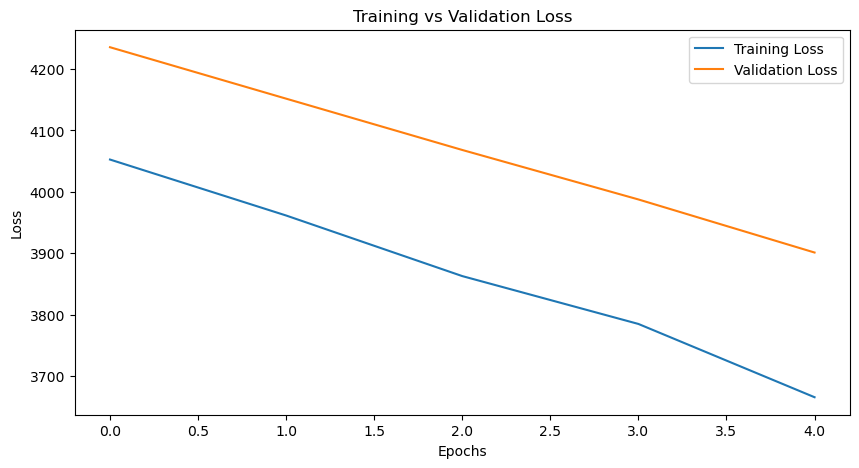

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
R² Score: -140.2064


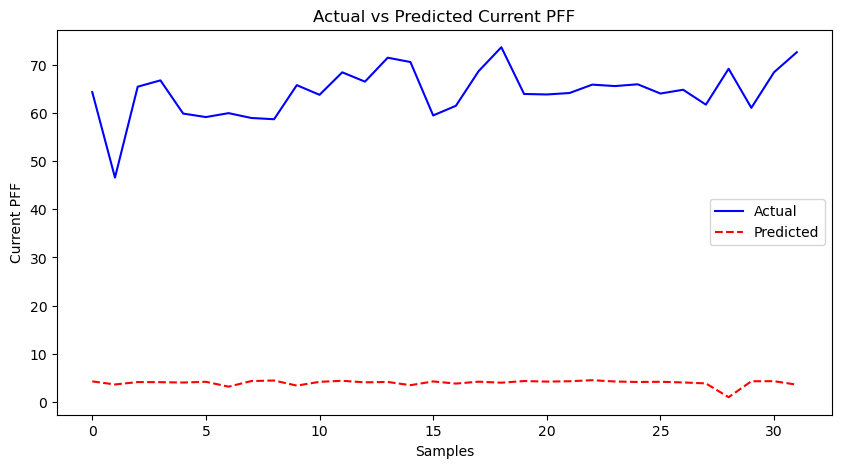

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3587.4937 - val_loss: 3793.5798
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3435.6414 - val_loss: 3664.7583
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3377.8235 - val_loss: 3504.9380
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3080.5735 - val_loss: 3311.0193
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2876.0774 - val_loss: 3073.1685
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2697.1221 - val_loss: 2774.0447
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2358.1812 - val_loss: 2406.4692
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1921.2260 - val_loss: 1965.2556
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1524.7767 - val_loss: 1469.6775
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 977.4126 - val_loss: 959.0146


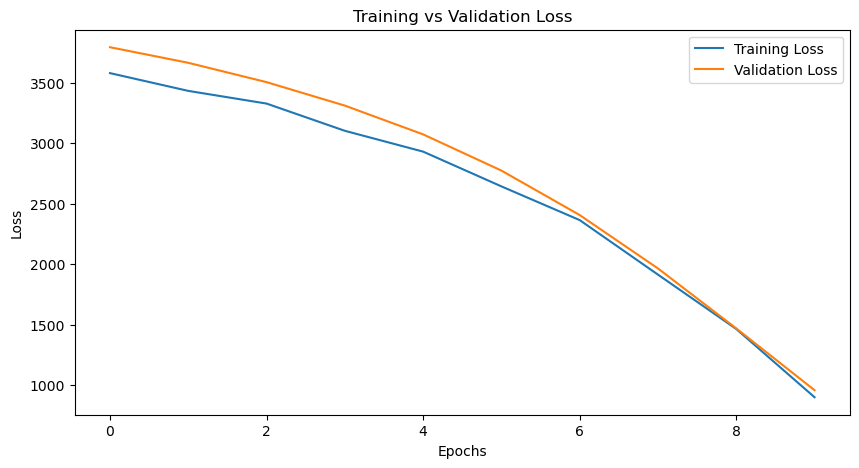

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
R² Score: -27.7063


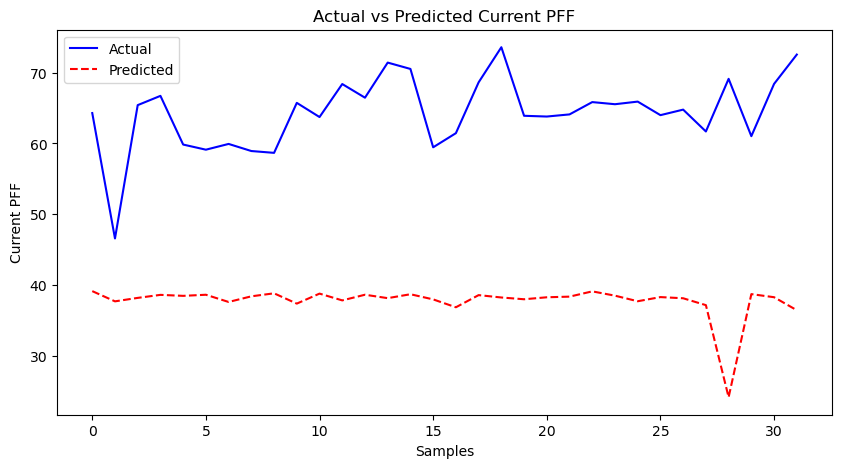

Epoch 1/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 607.5493 - val_loss: 504.5345
Epoch 2/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 296.0360 - val_loss: 193.9538
Epoch 3/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 64.1645 - val_loss: 91.2361
Epoch 4/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 108.7625 - val_loss: 110.5674
Epoch 5/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 171.4431 - val_loss: 122.0150
Epoch 6/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 202.2442 - val_loss: 103.8391
Epoch 7/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 99.1686 - val_loss: 111.5243
Epoch 8/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 98.2376 - val_loss: 157.1303
Epoch 9/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 62.3095 - val_loss: 207.0629
Epoch 10/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 118.6888 - val_loss: 221.2631
Epoch 11/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 103.3147 - val_loss: 198.6174
Epoch 12/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 

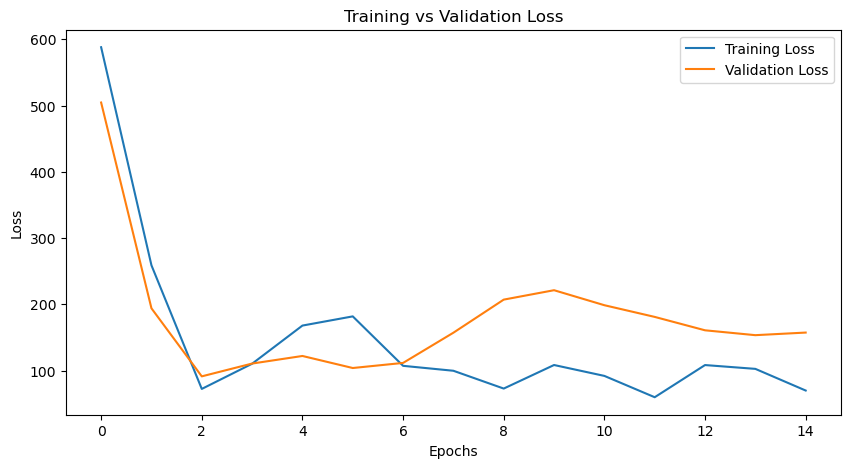

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
R² Score: -0.9825


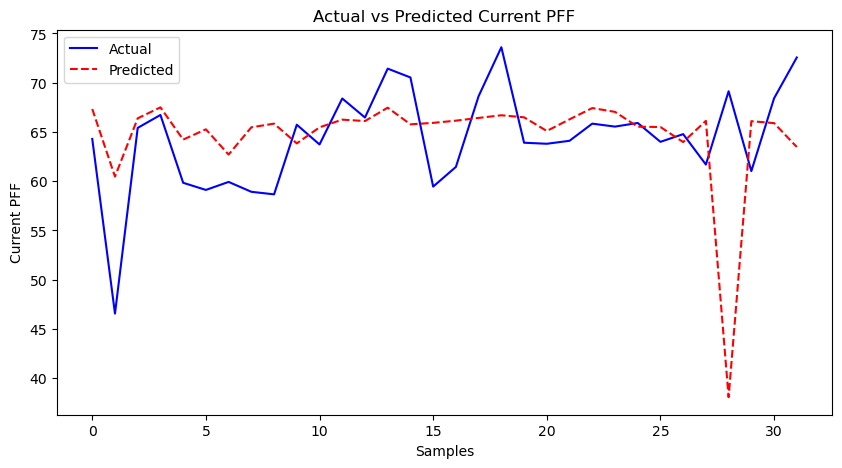

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 72.2875 - val_loss: 167.3842
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 68.5112 - val_loss: 191.7892
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 66.6188 - val_loss: 216.1051
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 56.1024 - val_loss: 250.0860
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 37.8286 - val_loss: 266.2036
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 37.1902 - val_loss: 276.0245
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 58.8725 - val_loss: 278.5291
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 89.1054 - val_loss: 246.8268
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 46.3722 - val_loss: 220.6957
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 74.5352 - val_loss: 229.7718
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 101.3140 - val_loss: 262.7757
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 38.17

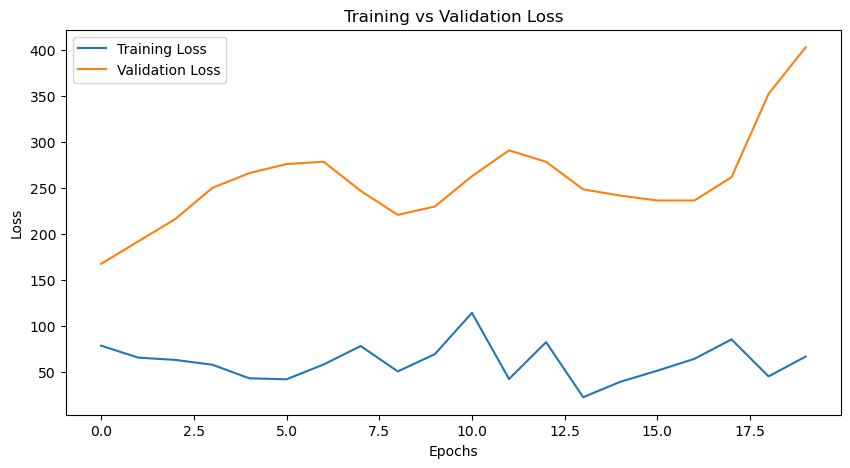

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
R² Score: -3.1573


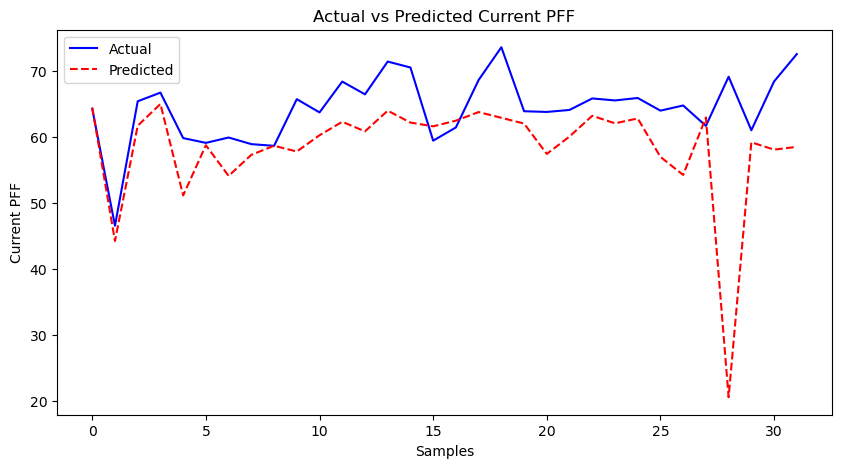

Epoch 1/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 33.1946 - val_loss: 387.2195
Epoch 2/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 32.0831 - val_loss: 373.6095
Epoch 3/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 30.4468 - val_loss: 370.1828
Epoch 4/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 56.8560 - val_loss: 375.4042
Epoch 5/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 49.4659 - val_loss: 367.9121
Epoch 6/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 72.4511 - val_loss: 362.4806
Epoch 7/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 78.0626 - val_loss: 358.4203
Epoch 8/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 57.1474 - val_loss: 357.4169
Epoch 9/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 49.9966 - val_loss: 382.6488
Epoch 10/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 44.6765 - val_loss: 432.9524
Epoch 11/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 118.4673 - val_loss: 414.3743
Epoch 12/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 43.75

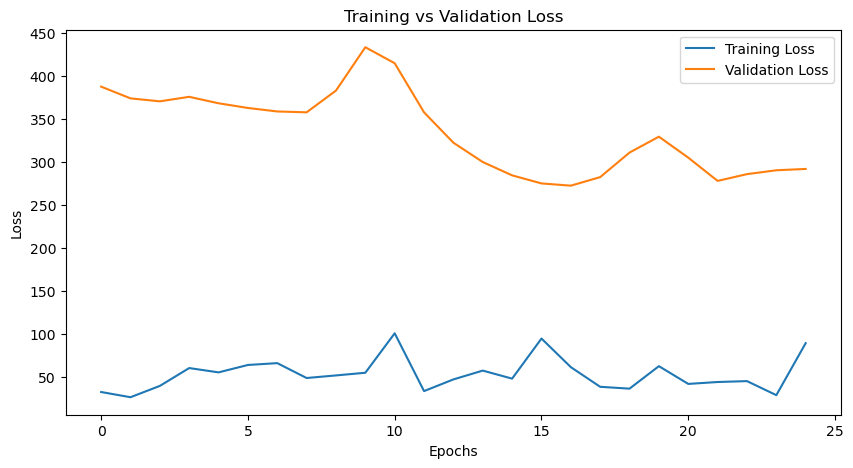

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
R² Score: -1.7013


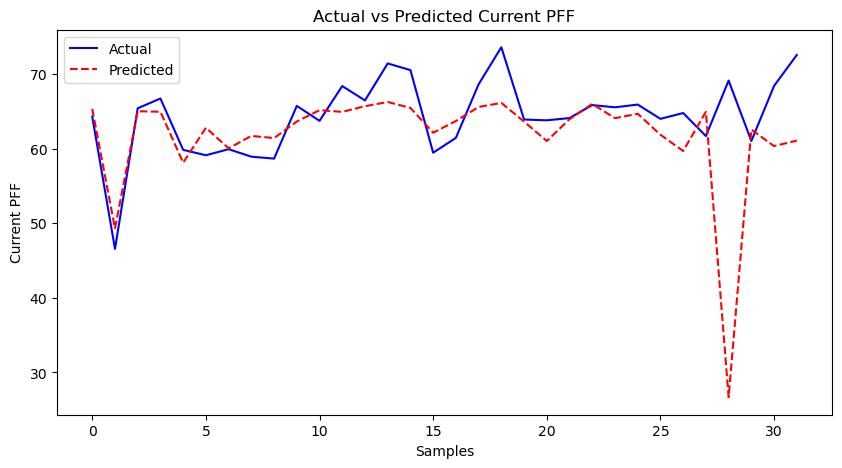

Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 40.3887 - val_loss: 276.6289
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 75.8061 - val_loss: 265.3115
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 41.7501 - val_loss: 273.3096
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 39.5808 - val_loss: 296.9887
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 45.9513 - val_loss: 302.3154
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 55.3329 - val_loss: 312.9409
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 39.5207 - val_loss: 316.1786
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 158.1958 - val_loss: 285.2290
Epoch 9/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 72.5588 - val_loss: 267.8503
Epoch 10/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 37.6664 - val_loss: 279.3694
Epoch 11/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 93.7279 - val_loss: 307.2851
Epoch 12/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 51.89

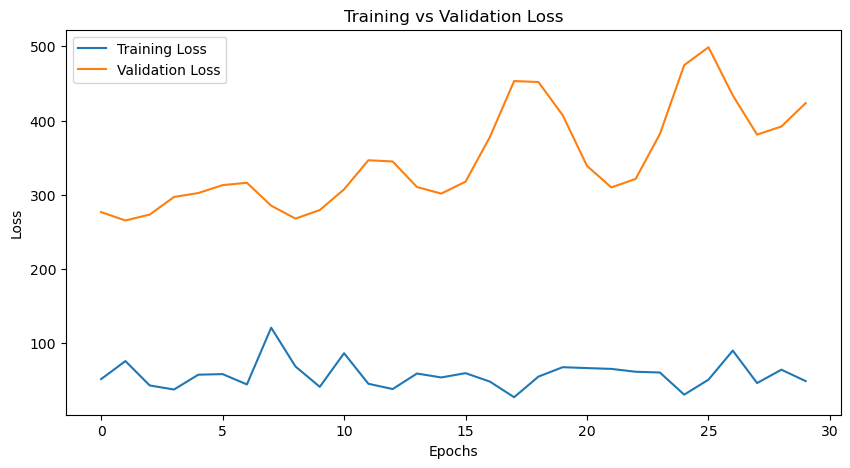

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
R² Score: -2.7715


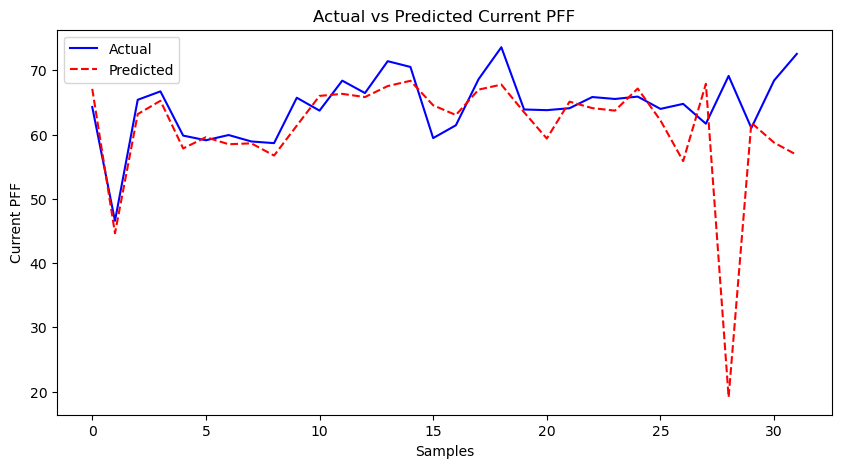

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 48.6687 - val_loss: 440.8192
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 54.9613 - val_loss: 447.8409
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 50.2026 - val_loss: 422.4133
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 33.7488 - val_loss: 396.8355
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 52.0443 - val_loss: 367.3841
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 51.0051 - val_loss: 346.0520
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 55.8881 - val_loss: 355.1053
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 23.7464 - val_loss: 396.8433
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 30.2939 - val_loss: 418.9571
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 31.5820 - val_loss: 390.7714
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 37.0380 - val_loss: 360.3178
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 66.288

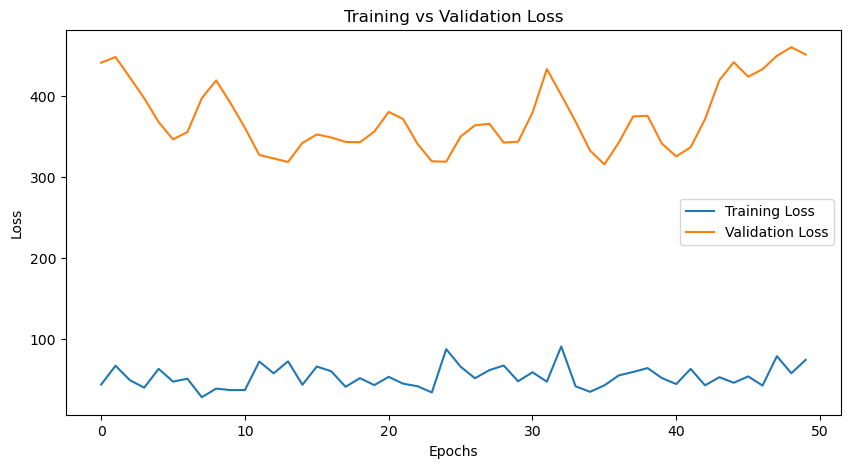

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
R² Score: -3.2024


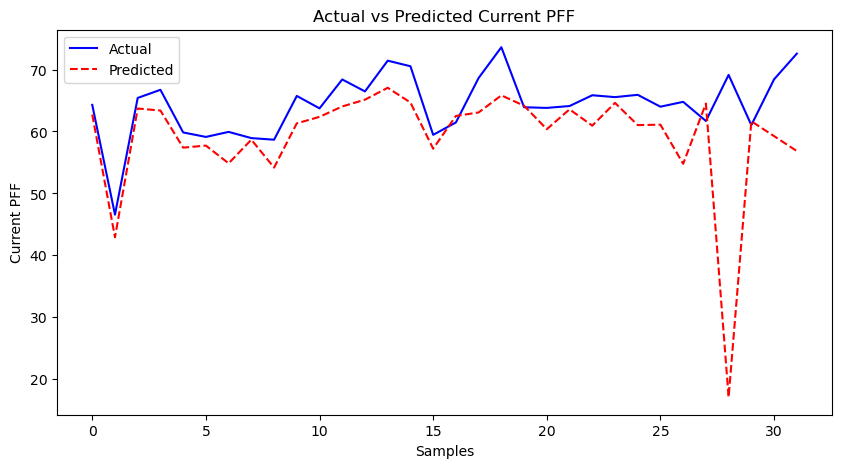

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 51.9824 - val_loss: 424.3117
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 57.6170 - val_loss: 393.9060
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 61.5373 - val_loss: 379.0339
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 64.1209 - val_loss: 360.4624
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 58.1947 - val_loss: 325.0984
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 84.3465 - val_loss: 313.5079
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 75.7622 - val_loss: 330.4142
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 51.9505 - val_loss: 363.2325
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 45.7480 - val_loss: 377.6126
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 49.5754 - val_loss: 367.0535
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 35.1277 - val_loss: 347.1391
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - 

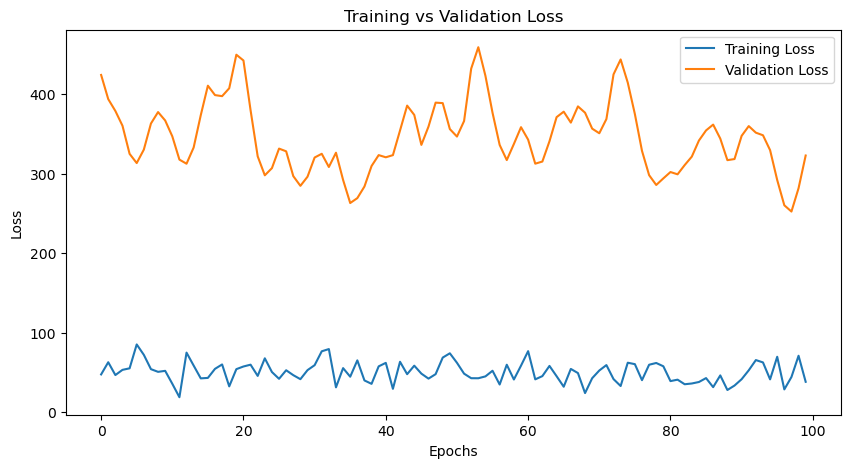

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
R² Score: -1.9770


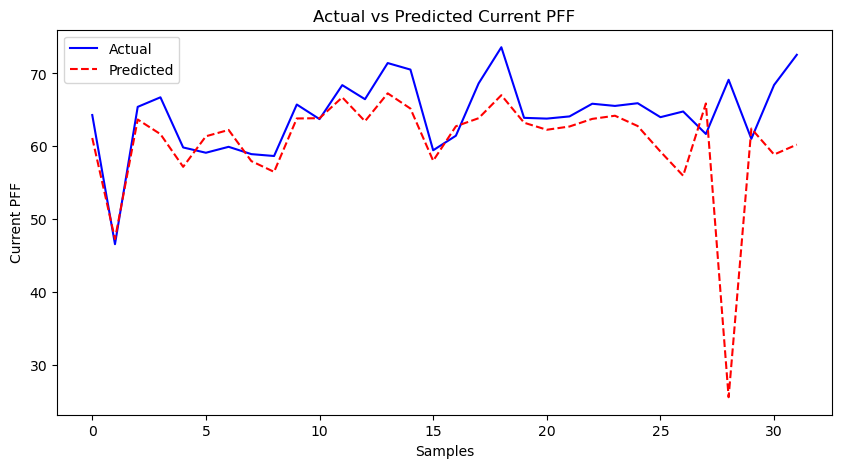

Epoch 1/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 47.9184 - val_loss: 335.1722
Epoch 2/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 58.0714 - val_loss: 332.7213
Epoch 3/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 33.3447 - val_loss: 325.5685
Epoch 4/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 53.1420 - val_loss: 331.8005
Epoch 5/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 29.2718 - val_loss: 343.8158
Epoch 6/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 38.1966 - val_loss: 359.2480
Epoch 7/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 37.8832 - val_loss: 404.2411
Epoch 8/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 34.7994 - val_loss: 453.3755
Epoch 9/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 82.2079 - val_loss: 445.6717
Epoch 10/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 79.1470 - val_loss: 410.1577
Epoch 11/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 39.4054 - val_loss: 381.4387
Epoch 12/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - 

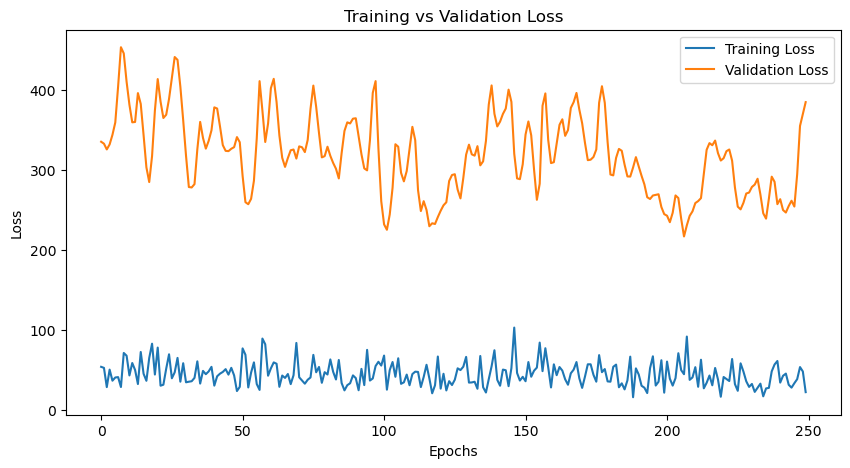

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R² Score: -2.4348


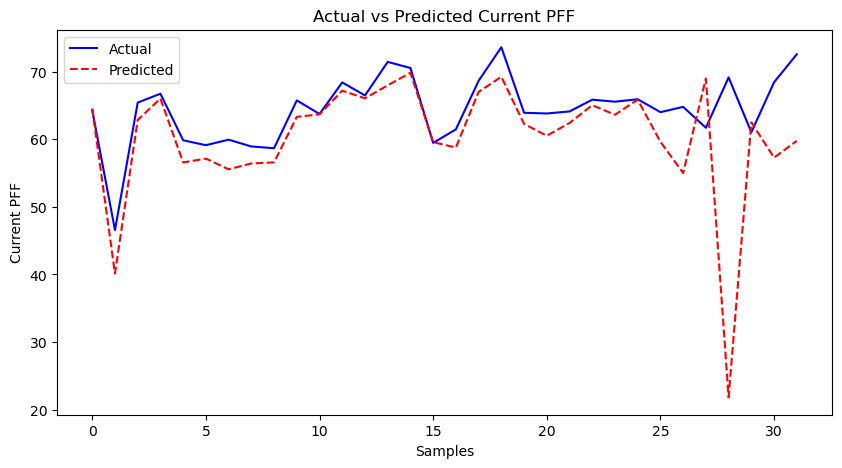

In [12]:
# Train the model
#history = model.fit(X, y, epochs=100, batch_size=8, validation_split=0.2, callbacks=[early_stopping])
epoch_list = [5, 10, 15, 20, 25, 30, 50, 100, 250]
for e in epoch_list:
    history = model.fit(X, y, epochs=e, batch_size=8, validation_split=0.2)
    # Plot training & validation loss
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training vs Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    # Make predictions on the test set
    y_pred = model.predict(X)
    from sklearn.metrics import r2_score

    # Calculate R² score
    r2 = r2_score(y, y_pred)

    # Print R² score
    print(f"R² Score: {r2:.4f}")
    # Plot actual vs predicted values
    plt.figure(figsize=(10, 5))
    plt.plot(y, label='Actual', color='blue')
    plt.plot(y_pred, label='Predicted', color='red', linestyle='dashed')
    plt.title('Actual vs Predicted Current PFF')
    plt.xlabel('Samples')
    plt.ylabel('Current PFF')
    plt.legend()
    plt.show()

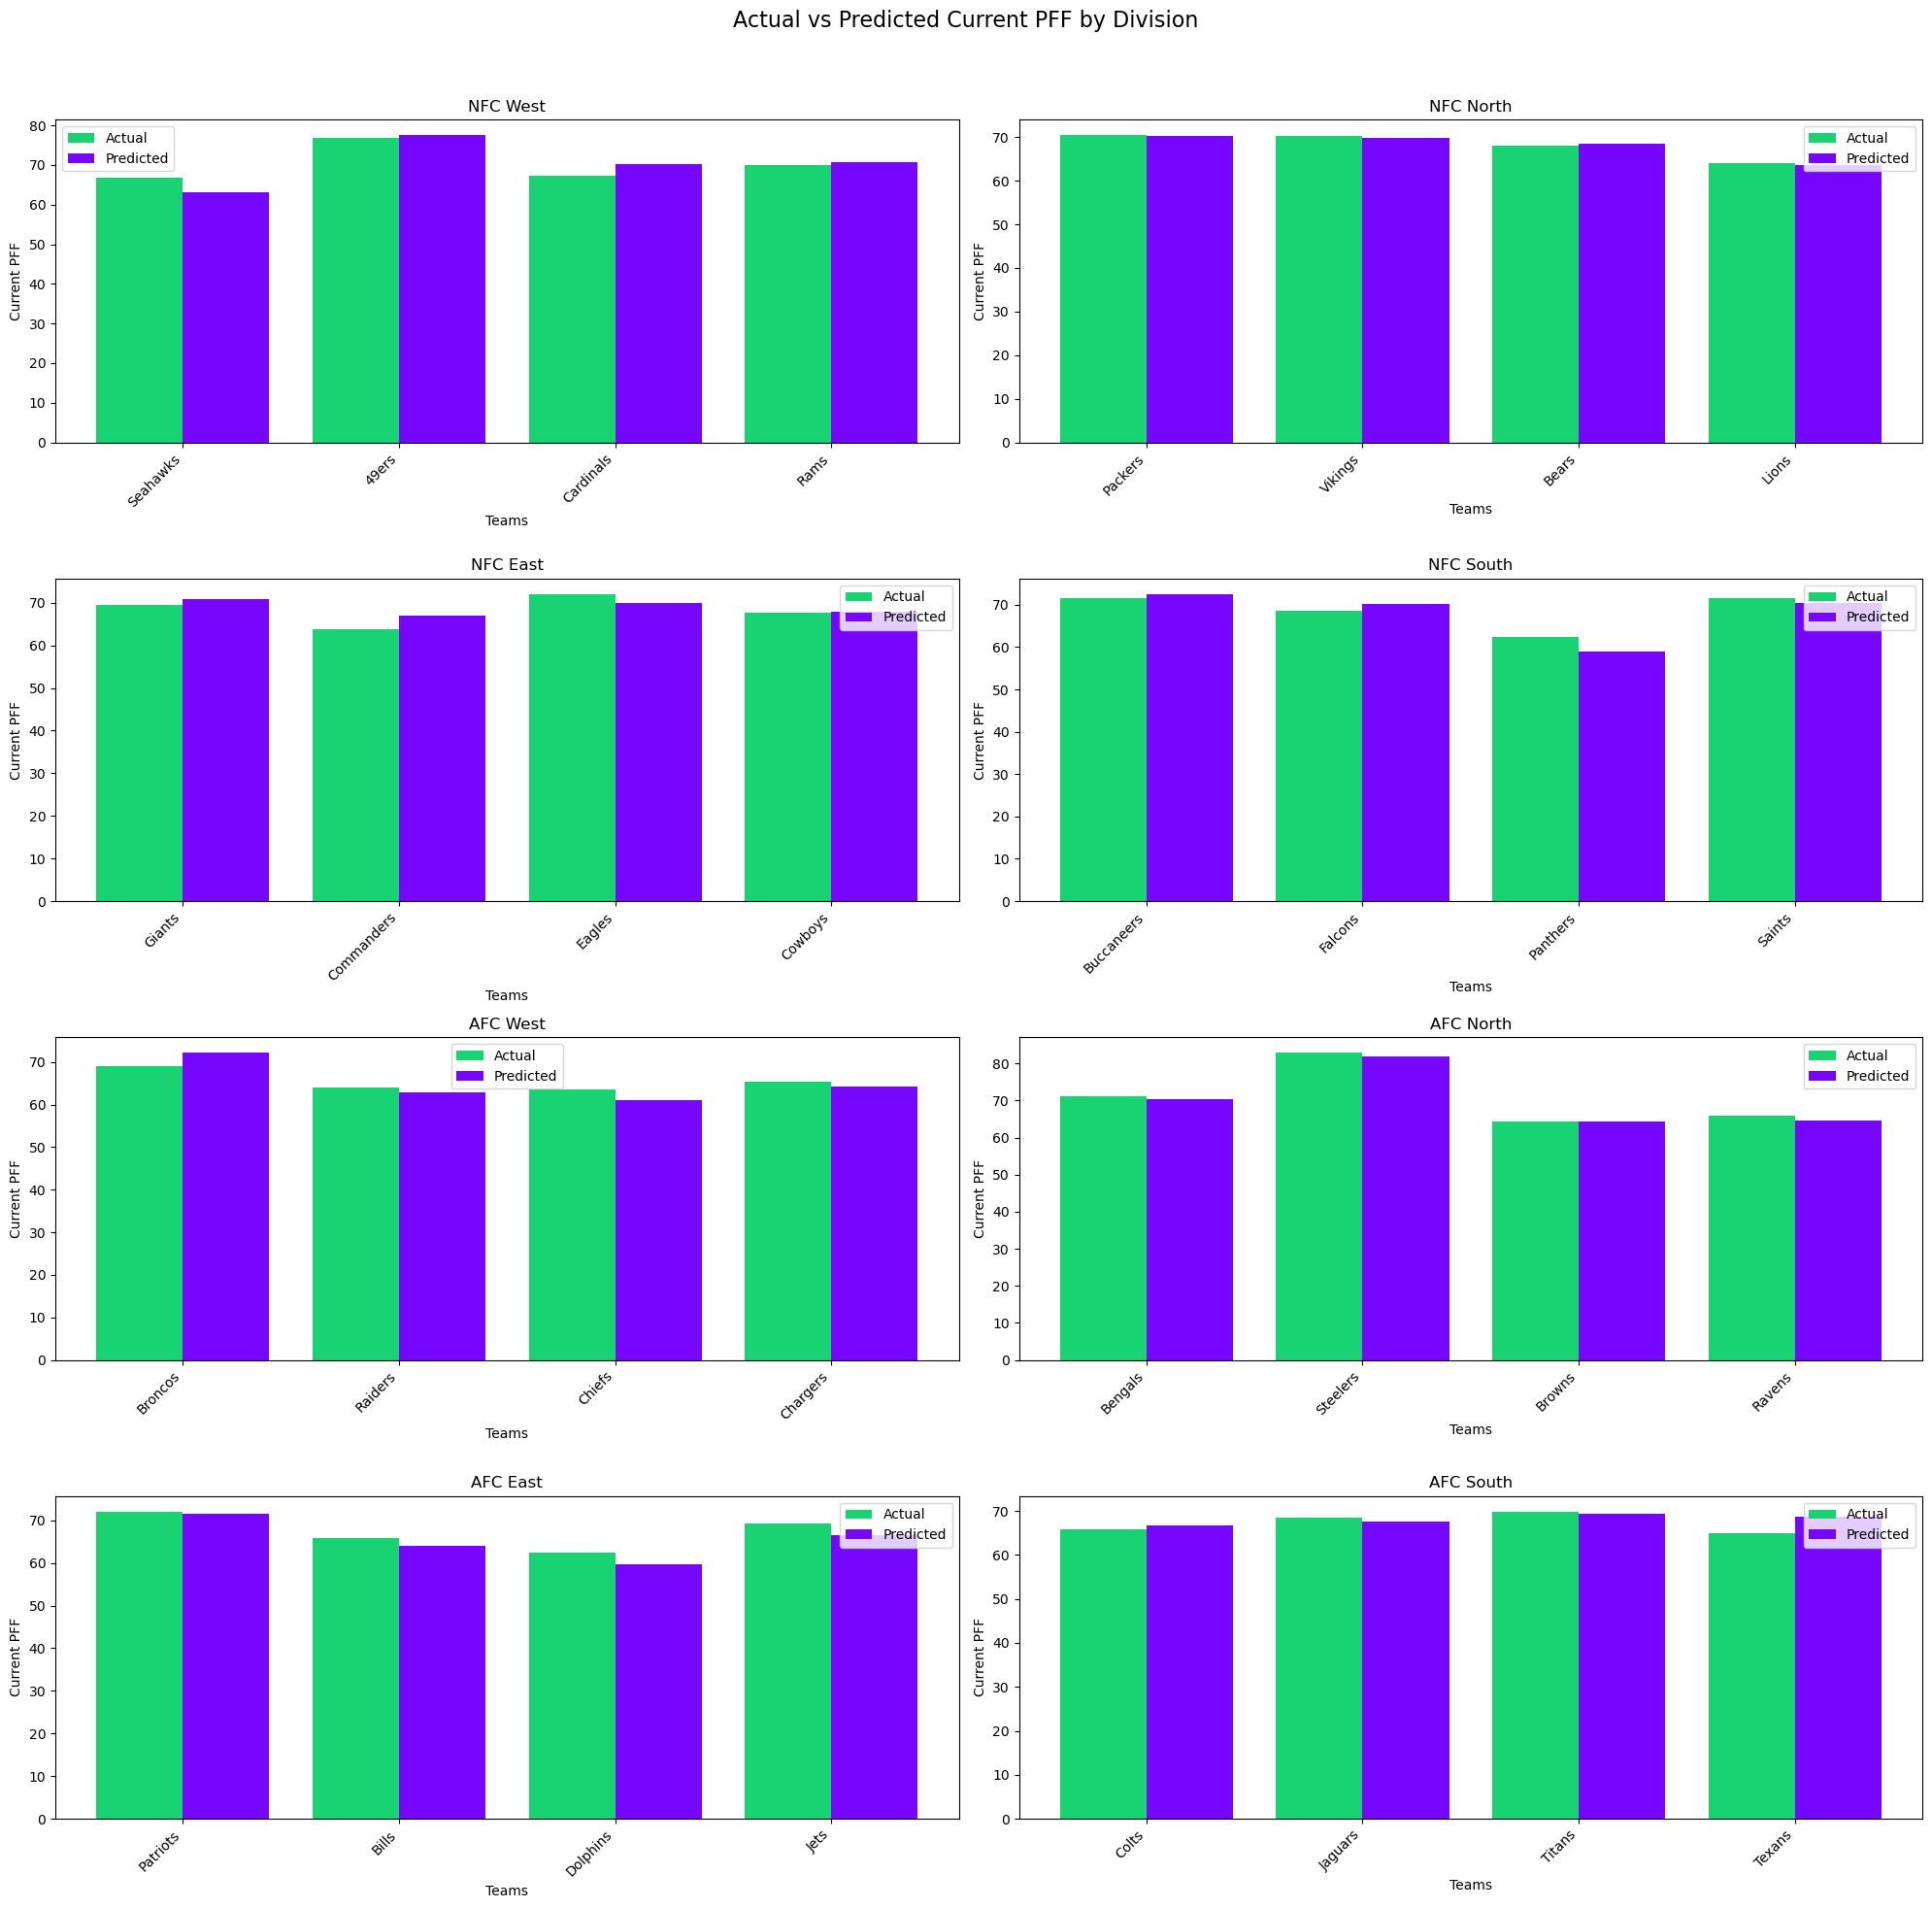

In [13]:
# Updated code with the user-provided hex colors for the bar plots
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Combined_Secondary_Defense.csv'
data = pd.read_csv(file_path)

# Filter for the latest year (if applicable) or ensure one entry per team
# Here, we'll use the first occurrence for simplicity
data = data.drop_duplicates(subset='Team', keep='first')

# Extract relevant columns
teams = data['Team'].values  # Team names
y = data['Current_PFF'].values  # Actual values (Current PFF)

# Mock predicted values for demonstration (replace with model predictions)
np.random.seed(42)  # For reproducibility
y_pred = y + np.random.normal(0, 2, size=len(y))  # Add small noise to actual values

# Division mapping
divisions = {
    'NFC West': ['49ers', 'Seahawks', 'Rams', 'Cardinals'],
    'NFC North': ['Packers', 'Vikings', 'Bears', 'Lions'],
    'NFC East': ['Cowboys', 'Giants', 'Eagles', 'Commanders'],
    'NFC South': ['Saints', 'Falcons', 'Buccaneers', 'Panthers'],
    'AFC West': ['Chiefs', 'Raiders', 'Broncos', 'Chargers'],
    'AFC North': ['Ravens', 'Bengals', 'Browns', 'Steelers'],
    'AFC East': ['Bills', 'Patriots', 'Dolphins', 'Jets'],
    'AFC South': ['Colts', 'Titans', 'Jaguars', 'Texans']
}

# Initialize storage for plotting
division_data = {}

# Group teams by division
for division, division_teams in divisions.items():
    mask = np.isin(teams, division_teams)  # Find teams in this division
    division_data[division] = {
        'teams': teams[mask],
        'y': y[mask],
        'y_pred': y_pred[mask]
    }

# Plot each division separately
fig, axes = plt.subplots(4, 2, figsize=(20, 20))  # 4 rows, 2 columns
fig.suptitle('Actual vs Predicted Current PFF by Division', fontsize=16)

for ax, (division, data) in zip(axes.flatten(), division_data.items()):
    teams_div = data['teams']
    y_div = data['y']
    y_pred_div = data['y_pred']
    x = np.arange(len(teams_div))  # Generate x-axis positions
    width = 0.4  # Bar width

    # Plot actual and predicted for this division
    ax.bar(x - width / 2, y_div, width, label='Actual', color='#19D373')  # Hex for Actual
    ax.bar(x + width / 2, y_pred_div, width, label='Predicted', color='#7606FC')  # Hex for Predicted
    
    ax.set_xticks(x)
    ax.set_xticklabels(teams_div, rotation=45, ha='right')
    ax.set_title(division)
    ax.set_xlabel('Teams')
    ax.set_ylabel('Current PFF')
    ax.legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()


In [14]:
# Import necessary libraries
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, SimpleRNN, MultiHeadAttention, LayerNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [15]:
# Function to prepare data sequences for a given target metric
def prepare_sequences(dl_df, target_metric, sequence_length=3):
    sequences = []
    targets = []
    team_data = dl_df.groupby('Team')

    for team, group in team_data:
        # Ensure the team has enough data
        if len(group) >= sequence_length + 1:
            # Iterate through the data to create sequences
            for i in range(len(group) - sequence_length):
                # Select the relevant columns for the sequence
                sequence = group.iloc[i:i+sequence_length][[
                    'Previous_grades_tackle', 
                    'Previous_AV',
                    'Previous_PFF',
                    'Previous_franchise_id',
                    'Previous_grades_run_defense',
                    'Previous_grades_coverage_defense',
                    'Previous_tackles_for_loss'
                ]]
                
                # The target is the next year's target_metric
                target = group.iloc[i+sequence_length][target_metric]
                
                sequences.append(sequence.values)
                targets.append(target)
    
    # Convert lists to numpy arrays
    X = np.array(sequences)
    y = np.array(targets)
    
    print(f"Total sequences generated for {target_metric}: {len(sequences)}")
    print(f"X shape: {X.shape}, y shape: {y.shape}")
    
    # Reshape X to (samples, timesteps, features)
    X = X.reshape(X.shape[0], sequence_length, -1)
    
    # Scale the features
    scaler = StandardScaler()
    X = scaler.fit_transform(X.reshape(-1, X.shape[-1])).reshape(X.shape)
    
    return X, y, scaler


In [16]:
# Function to build the model
def build_model(input_shape):
    inputs = Input(shape=input_shape)  # (timesteps, features)
    
    # Add a Dense layer before the attention to create more variability in the input
    dense_input = Dense(16, activation='relu')(inputs)
    
    # Add MultiHeadAttention layer
    attention_output = MultiHeadAttention(num_heads=2, key_dim=8)(dense_input, dense_input)
    
    # Add Layer Normalization for stability
    attention_output = LayerNormalization()(attention_output)
    
    # Add RNN layer to capture temporal dependencies
    rnn_output = SimpleRNN(units=50, activation='relu')(attention_output)
    
    # Add Dropout to prevent overfitting
    rnn_output = Dropout(0.2)(rnn_output)
    
    # Output layer for predicting the target metric
    output = Dense(1)(rnn_output)
    
    # Define the model
    model = Model(inputs=inputs, outputs=output)
    
    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    return model


In [17]:
# Function to train and evaluate the model
def train_and_evaluate(X, y, target_metric, epochs_list, batch_size=8):
    input_shape = (X.shape[1], X.shape[2])  # (timesteps, features)
    model = build_model(input_shape)
    
    for e in epochs_list:
        print(f"\nTraining {target_metric} with {e} epochs...")
        history = model.fit(
            X, y, 
            epochs=e, 
            batch_size=batch_size, 
            validation_split=0.2, 
            verbose=1
        )
        
        # Plot training & validation loss
        plt.figure(figsize=(10, 5))
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'Training vs Validation Loss for {target_metric} - {e} Epochs')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()
        
        # Make predictions on the entire dataset (you might want to separate into train/test)
        y_pred = model.predict(X)
        
        # Calculate R² score
        r2 = r2_score(y, y_pred)
        print(f"R² Score for {target_metric} after {e} epochs: {r2:.4f}")
        
        # Plot actual vs predicted values
        plt.figure(figsize=(10, 5))
        plt.scatter(range(len(y)), y, label='Actual', color='blue', alpha=0.5)
        plt.scatter(range(len(y_pred)), y_pred, label='Predicted', color='red', alpha=0.5)
        plt.title(f'Actual vs Predicted {target_metric} after {e} Epochs')
        plt.xlabel('Samples')
        plt.ylabel(target_metric)
        plt.legend()
        plt.show()

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


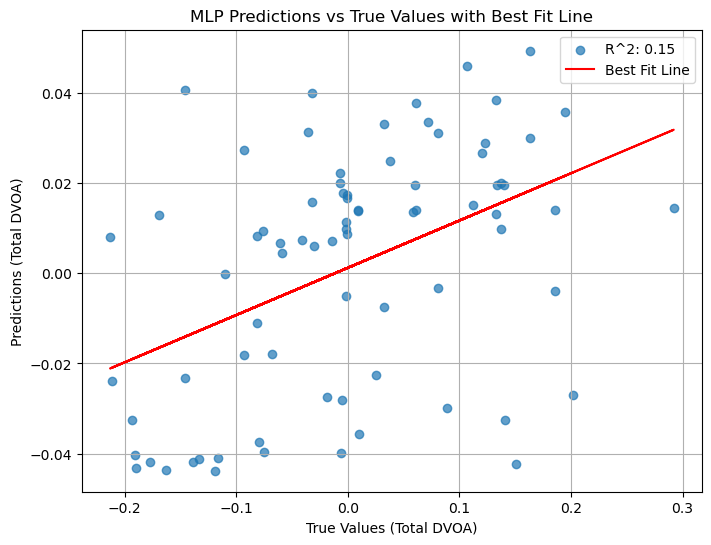

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Combined_Secondary_Defense.csv'  # Replace with the correct path to your file
data = pd.read_csv(file_path)

# Preprocessing
data['Total DVOA'] = data['Total DVOA'].str.rstrip('%').astype(float) / 100  # Convert percentages to decimals
data = data.dropna(subset=['Current_PFF', 'Net EPA'])  # Drop rows with missing values

# Add more features
X = data[['Current_PFF']].values  # Example features
y = data[['Net EPA']].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build an enhanced MLP model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dropout(0.3),  # Add dropout for regularization
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Single output for regression
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Lower learning rate
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])

# Train the model with early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=16, 
                    validation_split=0.2, callbacks=[early_stopping], verbose=0)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Compute R^2 score
r2 = r2_score(y_test, y_pred)

# Scatter plot with predictions vs true values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, label=f'R^2: {r2:.2f}')

# Line of best fit
m, b = np.polyfit(y_test.flatten(), y_pred.flatten(), 1)  # Linear fit
plt.plot(y_test, m * y_test + b, color='red', label='Best Fit Line')

# Plot formatting
plt.xlabel('True Values (Total DVOA)')
plt.ylabel('Predictions (Total DVOA)')
plt.title('MLP Predictions vs True Values with Best Fit Line')
plt.legend()
plt.grid(True)
plt.show()



In [19]:
# Import necessary libraries
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM, MultiHeadAttention, LayerNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.impute import SimpleImputer

# Function to clean percentage columns
def clean_percentage_column(dl_df, column):
    # Remove '%' and convert to float, then divide by 100 if it's a percentage
    dl_df[column] = dl_df[column].str.replace('%', '').astype(float) / 100.0
    return dl_df

# Function to prepare data sequences for a given target metric
def prepare_sequences(dl_df, target_metric, feature_cols, sequence_length=3, test_size=0.2):
    sequences = []
    targets = []
    team_data = dl_df.groupby('Team')

    for team, group in team_data:
        # Ensure the team has enough data
        if len(group) >= sequence_length + 1:
            # Iterate through the data to create sequences
            for i in range(len(group) - sequence_length):
                # Select the relevant columns for the sequence
                sequence = group.iloc[i:i+sequence_length][feature_cols]
                
                # The target is the next year's target_metric
                target = group.iloc[i+sequence_length][target_metric]
                
                sequences.append(sequence.values)
                targets.append(target)

    # Convert lists to numpy arrays
    X = np.array(sequences)
    y = np.array(targets)

    print(f"Total sequences generated for {target_metric}: {len(sequences)}")
    print(f"X shape: {X.shape}, y shape: {y.shape}")

    # Reshape X to (samples, timesteps, features)
    X = X.reshape(X.shape[0], sequence_length, -1)

    # Scale the features
    scaler = StandardScaler()
    X = scaler.fit_transform(X.reshape(-1, X.shape[-1])).reshape(X.shape)

    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    return X_train, X_test, y_train, y_test, scaler

# Function to build the model
def build_model(input_shape):
    inputs = Input(shape=input_shape)  # (timesteps, features)
    
    # Add a Dense layer before the attention to create more variability in the input
    dense_input = Dense(16, activation='relu')(inputs)
    
    # Add MultiHeadAttention layer
    attention_output = MultiHeadAttention(num_heads=2, key_dim=8)(dense_input, dense_input)
    
    # Add Layer Normalization for stability
    attention_output = LayerNormalization()(attention_output)
    
    # Add LSTM layer to capture temporal dependencies
    lstm_output = LSTM(units=50, activation='relu')(attention_output)
    
    # Add Dropout to prevent overfitting
    lstm_output = Dropout(0.2)(lstm_output)
    
    # Output layer for predicting the target metric
    output = Dense(1)(lstm_output)
    
    # Define the model
    model = Model(inputs=inputs, outputs=output)
    
    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    return model

# Function to train and evaluate the model
def train_and_evaluate(X_train, X_test, y_train, y_test, target_metric, epochs_list, batch_size=8):
    input_shape = (X_train.shape[1], X_train.shape[2])  # (timesteps, features)
    model = build_model(input_shape)
    
    # Debugging: Check data types
    print("\nData Types in X_train:", X_train.dtype)
    print("Data Types in X_test:", X_test.dtype)
    print("Data Types in y_train:", y_train.dtype)
    print("Data Types in y_test:", y_test.dtype)
    
    # Check for any non-numeric data
    if not np.issubdtype(X_train.dtype, np.number):
        raise ValueError("X_train contains non-numeric data.")
    if not np.issubdtype(X_test.dtype, np.number):
        raise ValueError("X_test contains non-numeric data.")
    if not np.issubdtype(y_train.dtype, np.number):
        raise ValueError("y_train contains non-numeric data.")
    if not np.issubdtype(y_test.dtype, np.number):
        raise ValueError("y_test contains non-numeric data.")
    
    for e in epochs_list:
        print(f"\nTraining {target_metric} with {e} epochs...")
        early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
        history = model.fit(
            X_train, y_train, 
            epochs=e, 
            batch_size=batch_size, 
            validation_data=(X_test, y_test), 
            callbacks=[early_stopping],
            verbose=1
        )
        
        # Plot training & validation loss
        plt.figure(figsize=(10, 5))
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'Training vs Validation Loss for {target_metric} - {e} Epochs')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()
        
        # Make predictions on the test set
        y_pred = model.predict(X_test)
        
        # Calculate evaluation metrics
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        print(f"R² Score for {target_metric} after {e} epochs: {r2:.4f}")
        print(f"MAE for {target_metric} after {e} epochs: {mae:.4f}")
        print(f"RMSE for {target_metric} after {e} epochs: {rmse:.4f}")
        
        # Plot actual vs predicted values with lines
        plt.figure(figsize=(10, 5))
        plt.plot(range(len(y_test)), y_test, label='Actual', color='blue', linestyle='-', marker='o', alpha=0.6)
        plt.plot(range(len(y_pred)), y_pred, label='Predicted', color='red', linestyle='--', marker='o', alpha=0.6)
        plt.title(f'Actual vs Predicted {target_metric} after {e} Epochs')
        plt.xlabel('Samples')
        plt.ylabel(target_metric)
        plt.legend()
        plt.show()


# Main Execution
if __name__ == "__main__":
    # Load the data
    dl_df = pd.read_csv('Combined_Secondary_Defense.csv')
    
    # Define the intended target metrics with correct column names
    intended_target_metrics = ['Net EPA', 'Total DVOA']  # Corrected target metrics
    
    # Drop unnecessary columns
    columns_to_drop = ['Unnamed: 0']
    dl_df = dl_df.drop(columns=columns_to_drop, errors='ignore')  # Use errors='ignore' to avoid issues if the column doesn't exist
    
    # Sort data by Team and Year
    dl_df = dl_df.sort_values(by=['Team', 'Year'])
    print("First few rows of the DataFrame:")
    print(dl_df.head())
    
    # Get the actual columns present
    actual_columns = dl_df.columns.tolist()
    
    # Filter target metrics to include only existing columns
    target_metrics = [metric for metric in intended_target_metrics if metric in actual_columns]
    
    # Notify the user about missing columns
    missing_metrics = [metric for metric in intended_target_metrics if metric not in actual_columns]
    if missing_metrics:
        print(f"Warning: The following target metrics are missing in the DataFrame and will be skipped: {missing_metrics}")
    
    # Encode 'Previous_franchise_id' if it exists
    if 'Previous_franchise_id' in actual_columns:
        print("Encoding 'Previous_franchise_id'...")
        label_encoder = LabelEncoder()
        dl_df['Previous_franchise_id_encoded'] = label_encoder.fit_transform(dl_df['Previous_franchise_id'])
        print("Encoding completed.")
    else:
        print("Warning: 'Previous_franchise_id' column is missing from the DataFrame.")
    
    # Update actual_columns after encoding
    actual_columns = dl_df.columns.tolist()
    
    # Define feature columns with encoded 'Previous_franchise_id'
    feature_columns = [
        'Previous_grades_tackle', 
        'Previous_AV',
        'Previous_PFF',
        'Previous_franchise_id_encoded',  # Use the encoded column
        'Previous_grades_run_defense',
        'Previous_grades_coverage_defense',
        'Previous_tackles_for_loss'
    ]
    
    # Check if all feature columns exist
    missing_features = [feature for feature in feature_columns if feature not in actual_columns]
    if missing_features:
        print(f"Error: The following feature columns are missing in the DataFrame: {missing_features}")
        raise ValueError("Missing feature columns. Please verify your DataFrame.")
    
    # Verify that all feature columns are numeric
    print("\nVerifying that all feature columns are numeric...")
    non_numeric_features = dl_df[feature_columns].select_dtypes(include=['object']).columns.tolist()
    if non_numeric_features:
        print(f"Error: The following feature columns contain non-numeric data: {non_numeric_features}")
        raise ValueError("Non-numeric data found in feature columns. Please encode or convert them to numeric types.")
    else:
        print("All feature columns are numeric.")
    
    # Check and handle non-numeric entries in feature columns
    print("\nChecking for non-numeric entries in feature columns...")
    for col in feature_columns:
        if dl_df[col].dtype == 'object':
            dl_df[col] = pd.to_numeric(dl_df[col], errors='coerce')
            print(f"Converted '{col}' to numeric. Non-convertible values are set to NaN.")
    
    # Check for NaN values in feature and target columns
    print("\nChecking for NaN values in feature and target columns...")
    nan_counts = dl_df[feature_columns + target_metrics].isnull().sum()
    print(nan_counts)
    
    # Handle NaN values in target metrics by cleaning percentage strings and converting to numeric
    for metric in target_metrics:
        if dl_df[metric].dtype == 'object':
            # Check if the column contains '%'
            if dl_df[metric].str.contains('%').any():
                print(f"\nCleaning percentage values in '{metric}'...")
                dl_df = clean_percentage_column(dl_df, metric)
                print(f"'{metric}' cleaned.")
            else:
                # Attempt to convert to numeric, coercing errors to NaN
                dl_df[metric] = pd.to_numeric(dl_df[metric], errors='coerce')
                print(f"Converted '{metric}' to numeric.")
    
    # Check for NaN values again after cleaning target metrics
    print("\nChecking for NaN values in target metrics after cleaning:")
    print(dl_df[target_metrics].isnull().sum())
    
    # Drop rows with NaN in target metrics
    dl_df_clean = dl_df.dropna(subset=target_metrics)
    print(f"\nNumber of rows after dropping NaN in target metrics: {dl_df_clean.shape[0]}")
    
    # Initialize the imputer with a strategy (e.g., mean)
    imputer = SimpleImputer(strategy='mean')
    
    # Fit and transform the feature columns
    dl_df_clean[feature_columns] = imputer.fit_transform(dl_df_clean[feature_columns])
    
    # Verify that there are no NaNs left in feature columns
    print("\nNumber of NaN values in feature columns after imputation:")
    print(dl_df_clean[feature_columns].isnull().sum())
    
    # Convert X_train, X_test, y_train, y_test to appropriate data types
    # This is already handled in the prepare_sequences function
    
    # Iterate over each valid target metric
    for metric in target_metrics:
        print(f"\nPreparing data for target metric: {metric}")
        X_train, X_test, y_train, y_test, scaler = prepare_sequences(dl_df_clean, metric, feature_columns)
        
        # Define the list of epochs you want to train for
        epoch_list = [5, 10, 15, 20, 25, 30, 50, 100, 250]
        
        # Train and evaluate the model
        train_and_evaluate(X_train, X_test, y_train, y_test, metric, epoch_list)


First few rows of the DataFrame:
      Team  Year Position  Value_cap_space  Value_draft_data  Current_AV  \
17   49ers  2019       DL        15.903294       1400.696696        53.0   
49   49ers  2019       LB        15.993624        146.484990        28.0   
81   49ers  2019       DB        15.313496        270.589442        35.0   
114  49ers  2020       DL         6.755802       1402.398565        39.0   
146  49ers  2020       LB         2.991927        144.514132        34.0   

     Current_PFF Total DVOA  win-loss-pct  Net EPA  ...  \
17     76.896506     27.90%        0.8125    0.216  ...   
49     63.131934     27.90%        0.8125    0.216  ...   
81     74.600742     27.90%        0.8125    0.216  ...   
114    60.632050      5.40%        0.3750    0.025  ...   
146    73.581955      5.40%        0.3750    0.025  ...   

     Previous_snap_counts_pass_rush  Previous_snap_counts_run_defense  \
17                       327.077444                        217.831236   
49       

ValueError: Missing feature columns. Please verify your DataFrame.